# PE4MOVE Data Understanding and Exploration

## 1. Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")

## 2. Load Dataset

Load the PE4MOVE dataset and display basic information about its structure.

In [6]:
# Load the dataset
df_I = pd.read_csv('data/intervention_group_clean.csv')
df_C = pd.read_csv('data/control_group_clean.csv')

print(f"Intervention group shape: {df_I.shape}")
print(f"\nControl group shape: {df_C.shape}")

Intervention group shape: (1007, 38)

Control group shape: (763, 38)


## 3. Initial Data Overview

Let's examine the structure, data types, and basic statistics of both datasets.

In [27]:
# Display first few rows of each dataset
display(df_I.head())

display(df_C.head())

Age  Sex  MVPA_Frequency_T0  Leisure_Exercise_T0  YAP_sedentary_general_T0  \
0   11    2                3.0                  0.0                       2.0   
1   11    2                1.0                  1.0                       4.0   
2   11    2                2.0                  4.0                       2.0   
3   11    2                4.0                  5.0                       2.0   
4   11    1                3.0                  4.0                       3.0   

   Leisure_PA_T0  MVPA_Usual_Week_T0 Group_Final  Weight_kg_T0  Weight_kg_T1  \
0            3.0                 3.0           A            39          41.0   
1            1.0                 1.0           A            45          40.0   
2            3.0                 3.0           A            54          53.0   
3            3.0                 4.0           A            38           NaN   
4            3.0                 3.0           A            44          42.0   

   ...  SLJ_T1  HG_Right_T0  HG_Left_T0  HG_Right_T1  HG_Left_T1  \
0  ...   162.0         50.0        55.0         60.0        60.0   
1  ...   110.0         21.0        20.0         20.0        20.0   
2  ...   143.0         23.0        21.0          NaN         NaN   
3  ...   135.0         18.0        20.0         22.0        20.0   
4  ...   153.0         50.0        50.0         55.0        50.0   

   MVPA_Improvement  Motivation_T0  Motivation_T1  Self_Monitoring_T0  \
0               0.0      12.333333      14.500000                4.25   
1               1.0            NaN            NaN                 NaN   
2               1.0       4.000000       1.166667                4.50   
3               0.0      13.166667       3.500000                4.00   
4               0.0      13.500000      12.333333                5.00   

   Self_Monitoring_T1  
0                4.00  
1                 NaN  
2                4.25  
3                 NaN  
4                3.00  

[5 rows x 38 columns]

Age  Sex  MVPA_Frequency_T0  Leisure_Exercise_T0  YAP_sedentary_general_T0  \
0   11    2                6.0                  1.0                       2.0   
1   11    2                2.0                  2.0                       2.0   
2   11    2                1.0                  2.0                       3.0   
3   11    1                2.0                  3.0                       3.0   
4   11    1                3.0                  4.0                       2.0   

   Leisure_PA_T0  MVPA_Usual_Week_T0 Group_Final  Weight_kg_T0  Weight_kg_T1  \
0            1.0                 6.0           B            30          43.0   
1            2.0                 2.0           B            32          32.0   
2            2.0                 1.0           B            65          69.0   
3            2.0                 2.0           B            36          36.0   
4            3.0                 2.0           B            37          38.0   

   ...  SLJ_T1  HG_Right_T0  HG_Left_T0  HG_Right_T1  HG_Left_T1  \
0  ...    90.0         23.0        24.0         11.0        12.0   
1  ...   185.0         22.0        23.0         21.0        20.0   
2  ...   129.0         23.0        17.0         20.0        19.0   
3  ...   136.0         14.0        10.0         10.0        10.0   
4  ...   197.0         24.0        25.0         24.0        22.0   

   MVPA_Improvement  Motivation_T0  Motivation_T1  Self_Monitoring_T0  \
0              -4.0      10.000000      11.500000                2.75   
1               1.0      13.666667      14.833333                2.75   
2               2.0      10.000000       2.500000                1.75   
3               2.0      11.500000       9.000000                3.50   
4               1.0       3.333333       9.500000                4.25   

   Self_Monitoring_T1  
0                2.75  
1                4.00  
2                 NaN  
3                3.75  
4                4.00  

[5 rows x 38 columns]

In [9]:
# Check for missing values
print("=" * 80)
print("INTERVENTION GROUP - Missing Values")
print("=" * 80)
missing_I = df_I.isnull().sum()
missing_I_pct = (missing_I / len(df_I) * 100).round(2)
missing_df_I = pd.DataFrame({
    'Missing Count': missing_I,
    'Percentage': missing_I_pct
}).sort_values('Missing Count', ascending=False)
print(missing_df_I[missing_df_I['Missing Count'] > 0])

print("\n" + "=" * 80)
print("CONTROL GROUP - Missing Values")
print("=" * 80)
missing_C = df_C.isnull().sum()
missing_C_pct = (missing_C / len(df_C) * 100).round(2)
missing_df_C = pd.DataFrame({
    'Missing Count': missing_C,
    'Percentage': missing_C_pct
}).sort_values('Missing Count', ascending=False)
print(missing_df_C[missing_df_C['Missing Count'] > 0])

INTERVENTION GROUP - Missing Values
                                   Missing Count  Percentage
Motivation_T1                                239       23.73
Weight_kg_T1                                 193       19.17
Height_cm_T1                                 193       19.17
Motivation_T0                                188       18.67
Self_Monitoring_T1                           161       15.99
SixMW_T1                                     130       12.91
HG_Right_T1                                  103       10.23
HG_Left_T1                                   101       10.03
Self_Monitoring_T0                            96        9.53
SLJ_T1                                        89        8.84
COVID_impact_T1                               87        8.64
YAP_sedentary_general_T1                      49        4.87
Extracurricular_Session_School_T1             41        4.07
MVPA_Improvement                              36        3.57
COVID_impact_T0                               34 

## 4. Distribution Analysis

Visualize the distribution of key numerical variables to understand their spread and identify potential outliers.

In [11]:
# Get numerical columns (excluding ID columns)
numerical_cols = df_I.select_dtypes(include=[np.number]).columns.tolist()
# Remove ID-like columns
numerical_cols = [col for col in numerical_cols if 'id' not in col.lower() and 'ID' not in col]

print(f"Found {len(numerical_cols)} numerical variables to analyze:")
print(numerical_cols)

Found 35 numerical variables to analyze:
['Age', 'Sex', 'MVPA_Frequency_T0', 'Leisure_Exercise_T0', 'YAP_sedentary_general_T0', 'Leisure_PA_T0', 'MVPA_Usual_Week_T0', 'Weight_kg_T0', 'Weight_kg_T1', 'Height_cm_T0', 'Height_cm_T1', 'MVPA_Frequency_T1', 'MVPA_Usual_Week_T1', 'Leisure_Exercise_T1', 'PE_hours_T0', 'PE_hours_T1', 'Extracurricular_Session_Coach_T0', 'Extracurricular_Session_Coach_T1', 'Extracurricular_Session_School_T0', 'Extracurricular_Session_School_T1', 'Leisure_PA_T1', 'YAP_sedentary_general_T1', 'SixMW_T0', 'SixMW_T1', 'SLJ_T0', 'SLJ_T1', 'HG_Right_T0', 'HG_Left_T0', 'HG_Right_T1', 'HG_Left_T1', 'MVPA_Improvement', 'Motivation_T0', 'Motivation_T1', 'Self_Monitoring_T0', 'Self_Monitoring_T1']


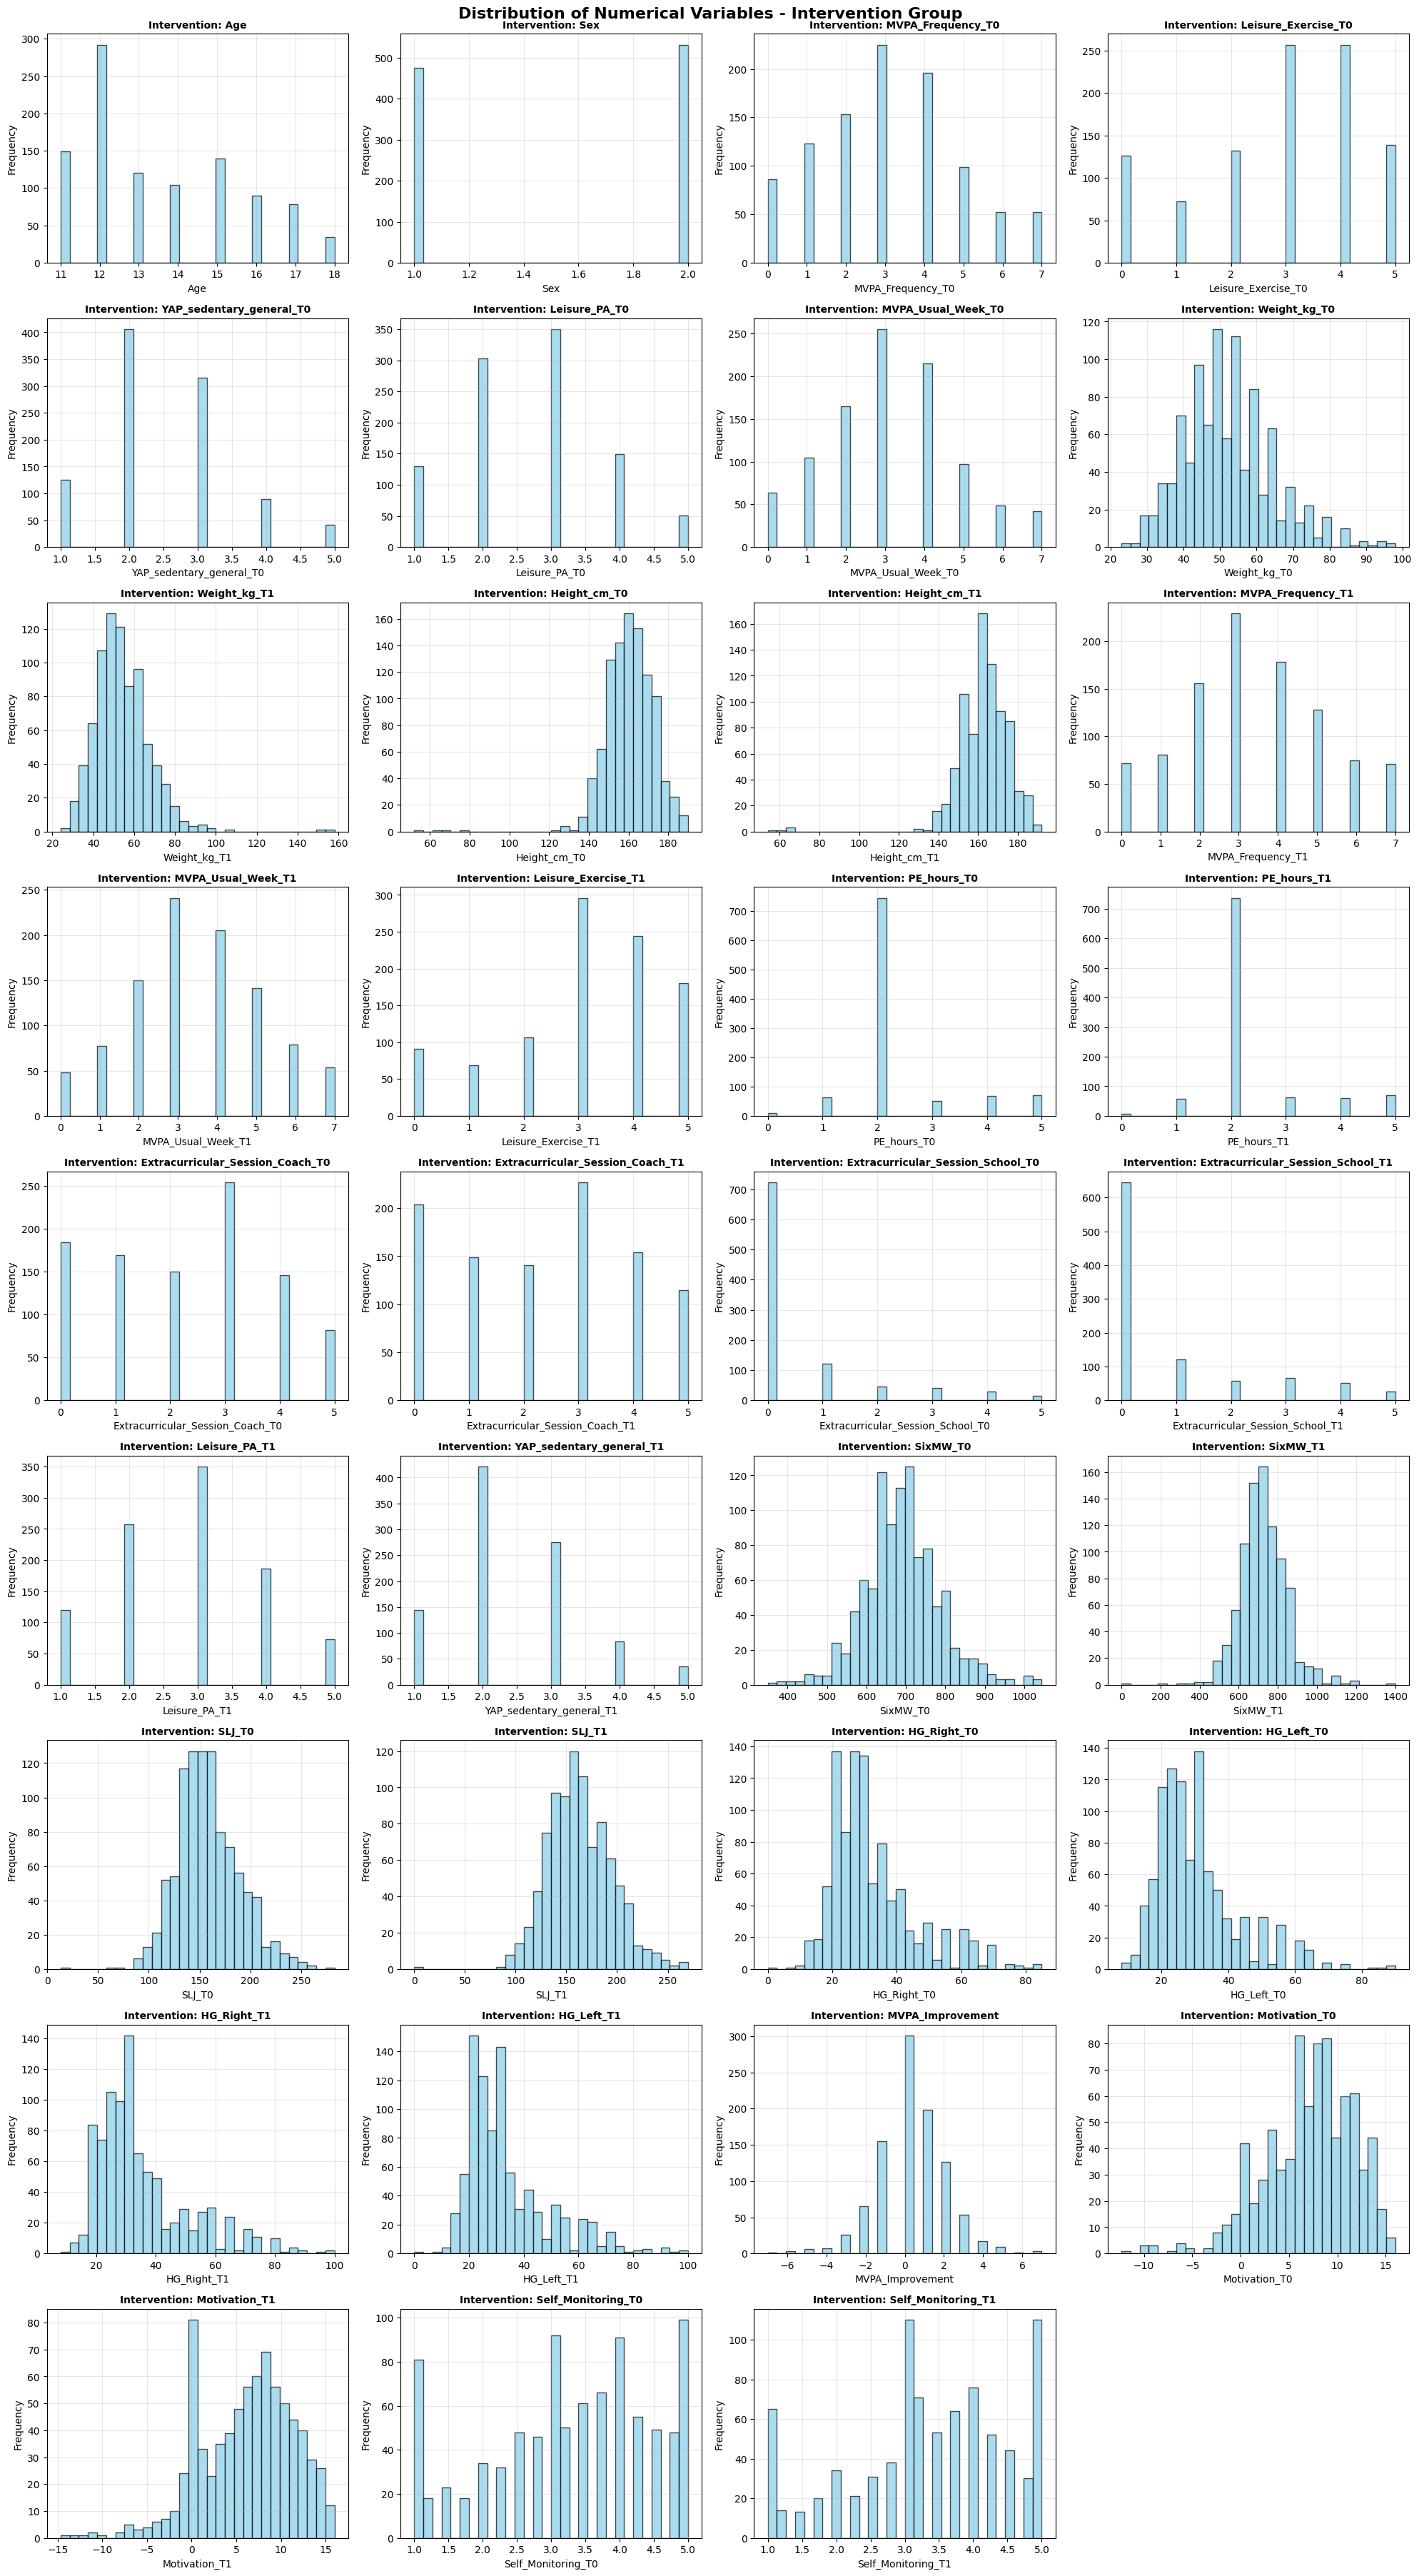

In [12]:
# Plot distributions for all numerical variables - Intervention Group
n_cols = 4
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df_I[col].dropna(), bins=30, edgecolor='black', alpha=0.7, color='skyblue')
    axes[idx].set_title(f'Intervention: {col}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

# Hide empty subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.suptitle('Distribution of Numerical Variables - Intervention Group', 
             fontsize=16, fontweight='bold', y=1.001)
plt.show()

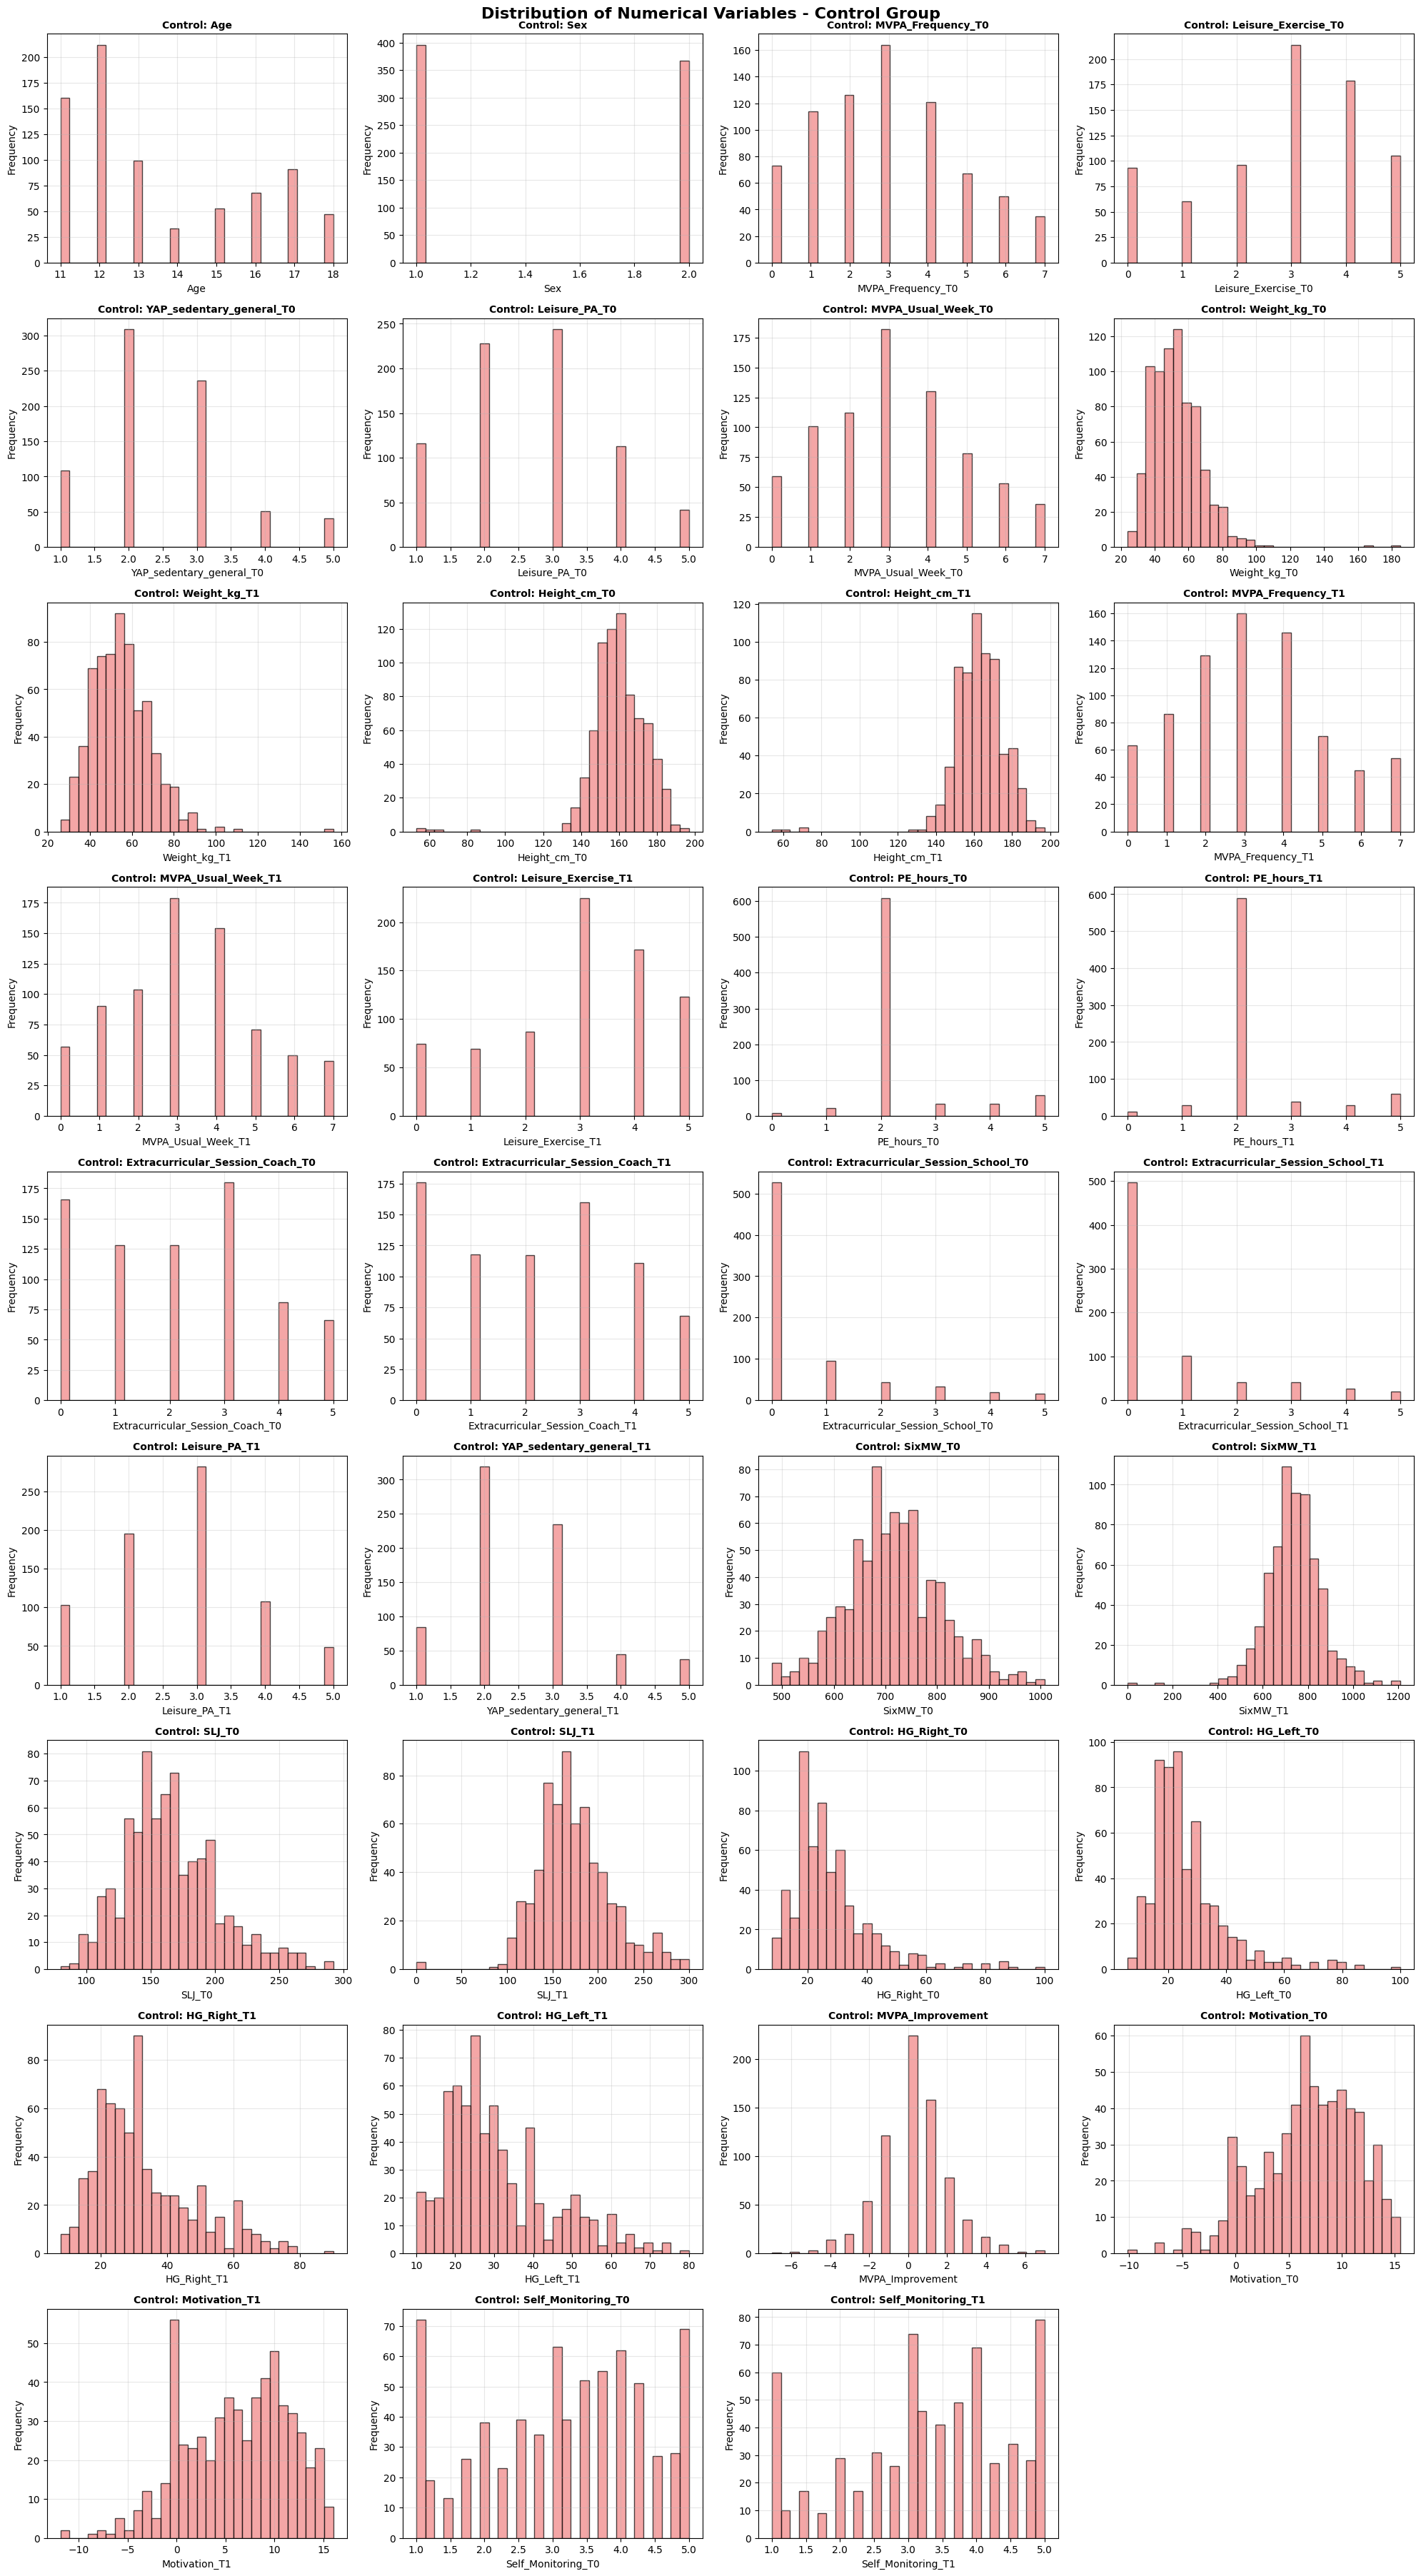

In [37]:
# Plot distributions for all numerical variables - Control Group
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df_C[col].dropna(), bins=30, edgecolor='black', alpha=0.7, color='lightcoral')
    axes[idx].set_title(f'Control: {col}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

# Hide empty subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.suptitle('Distribution of Numerical Variables - Control Group', 
             fontsize=16, fontweight='bold', y=1.001)
plt.show()

## 5. Box Plots for Outlier Detection

Box plots help identify outliers and compare distributions between intervention and control groups.

In [14]:
# Create combined dataset for comparison
df_I_labeled = df_I.copy()
df_I_labeled['Group'] = 'Intervention'
df_C_labeled = df_C.copy()
df_C_labeled['Group'] = 'Control'
df_combined = pd.concat([df_I_labeled, df_C_labeled], ignore_index=True)

print(f"Combined dataset shape: {df_combined.shape}")
print(f"Group distribution:\n{df_combined['Group'].value_counts()}")

Combined dataset shape: (1770, 39)
Group distribution:
Group
Intervention    1007
Control          763
Name: count, dtype: int64


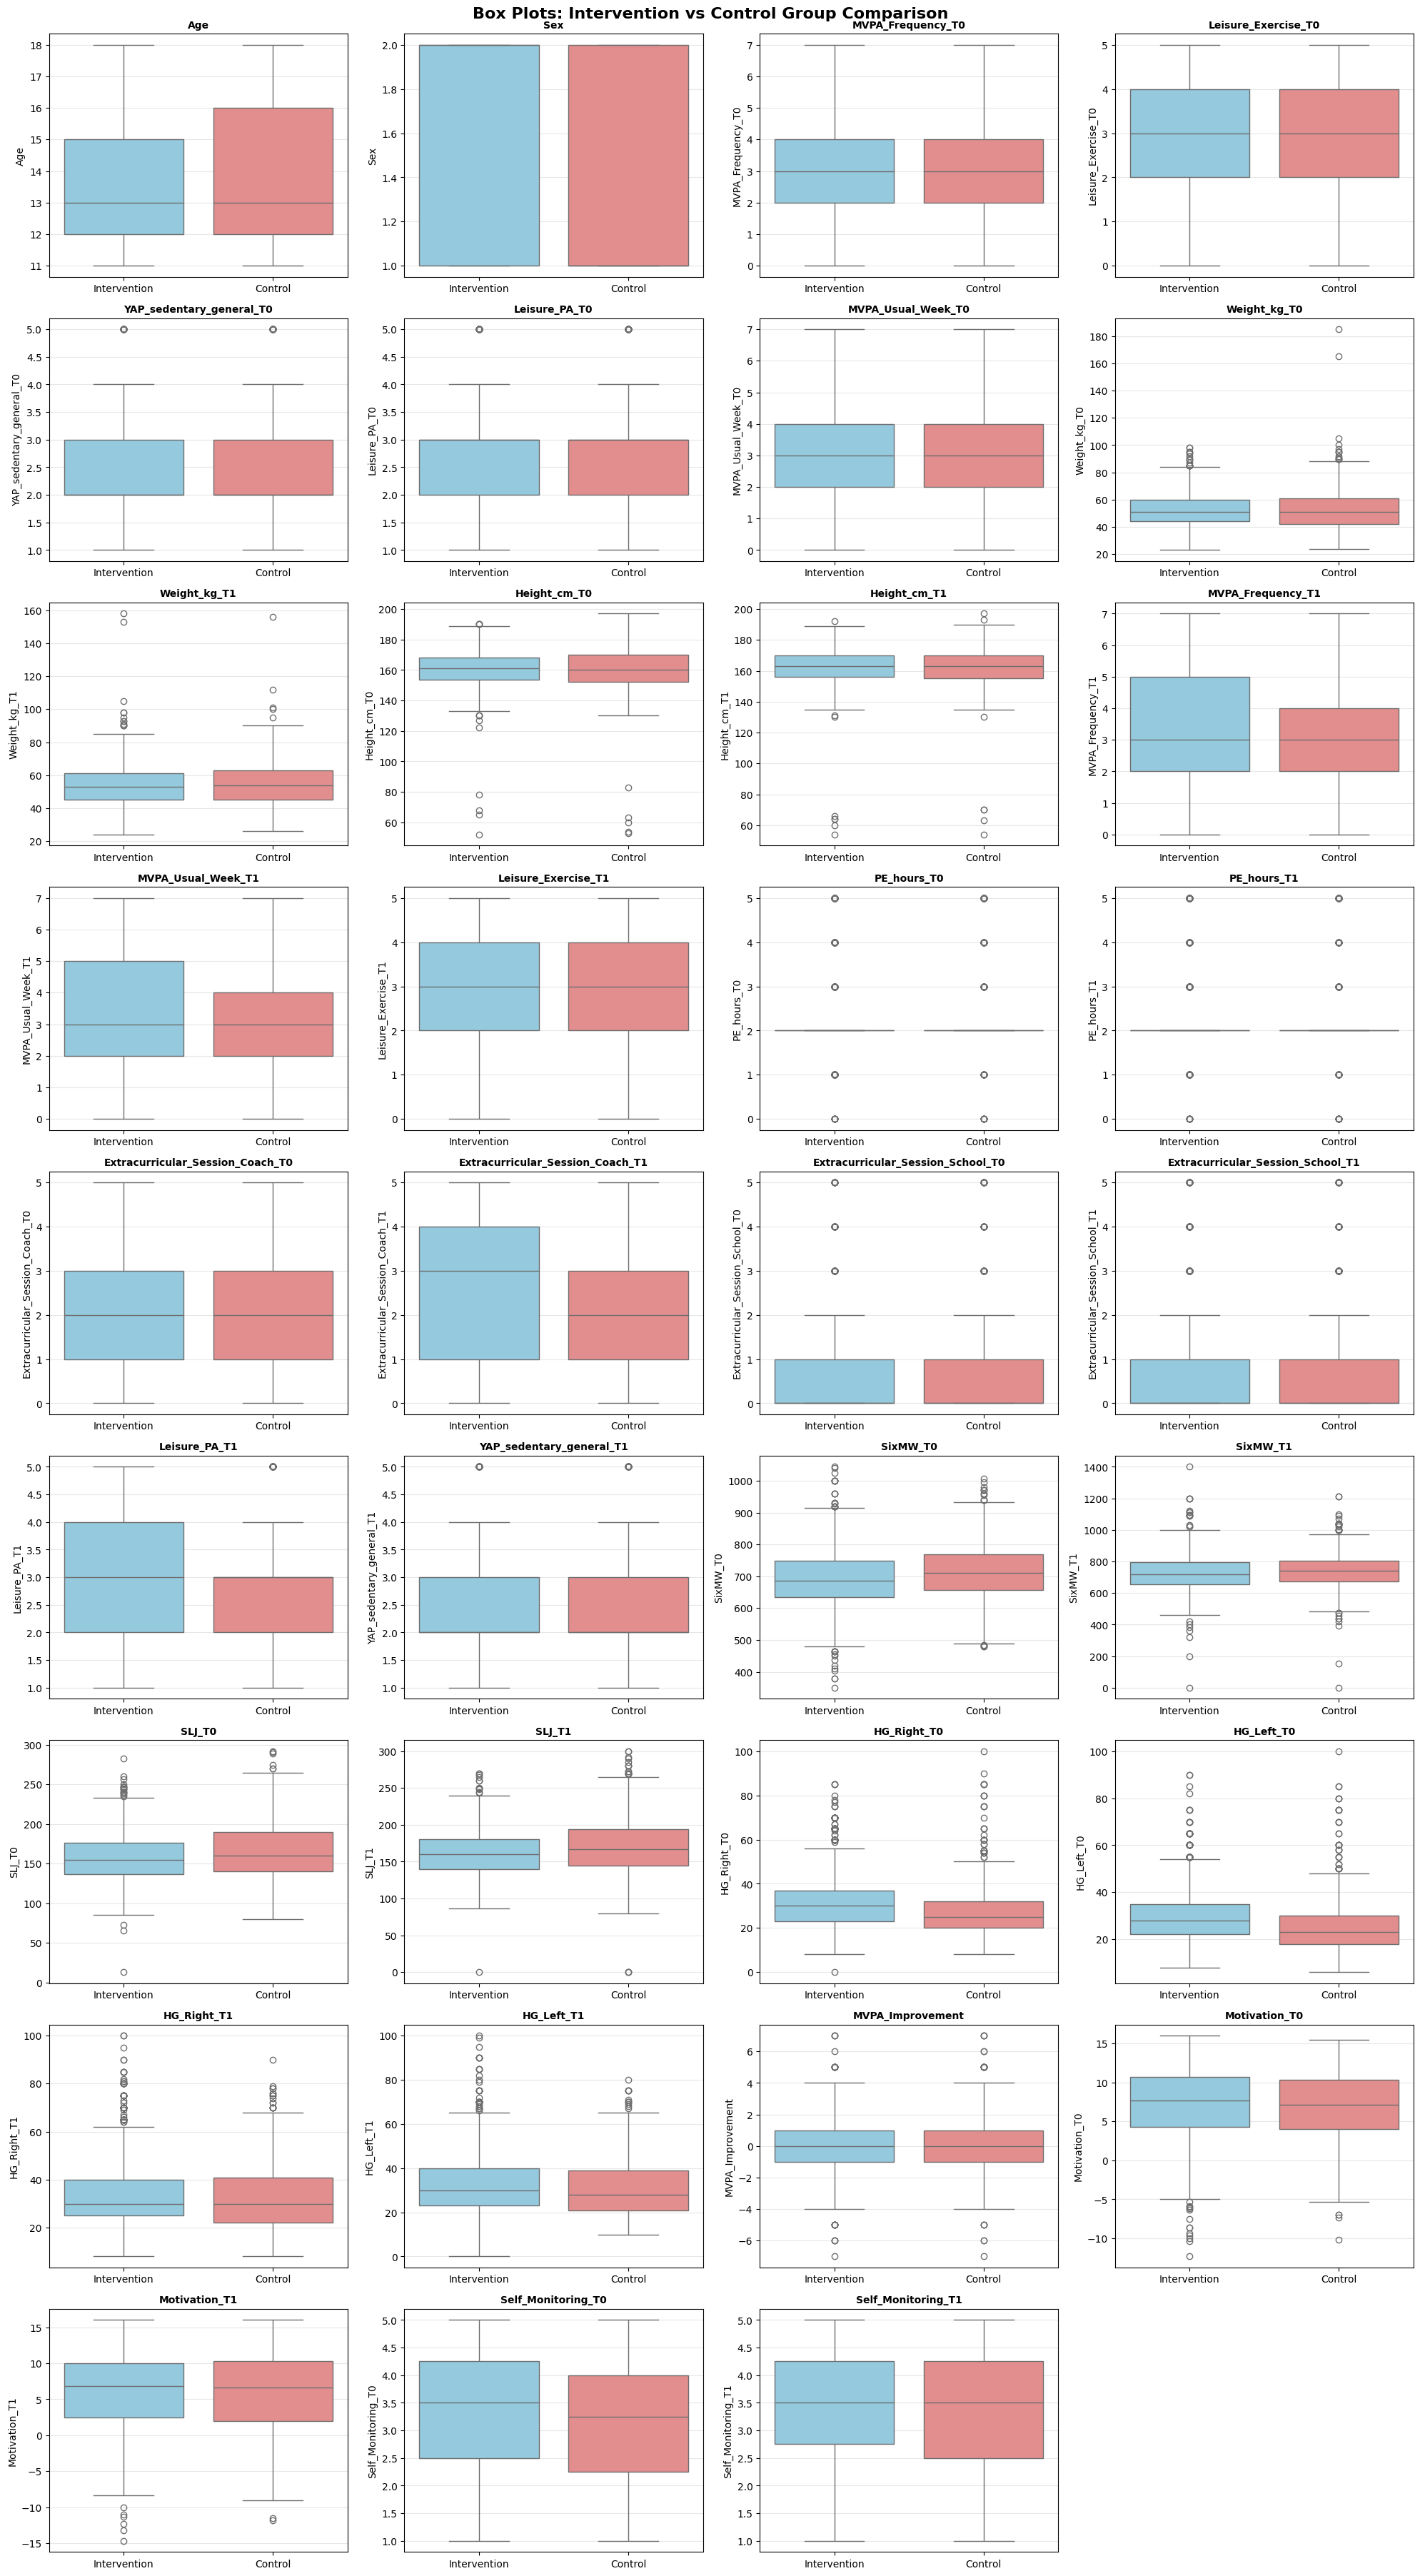

In [15]:
# Box plots comparing intervention vs control groups
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    sns.boxplot(data=df_combined, x='Group', y=col, ax=axes[idx], palette=['skyblue', 'lightcoral'])
    axes[idx].set_title(f'{col}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('')
    axes[idx].grid(True, alpha=0.3, axis='y')

# Hide empty subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.suptitle('Box Plots: Intervention vs Control Group Comparison', 
             fontsize=16, fontweight='bold', y=1.001)
plt.show()

## 6. Correlation Analysis

Analyze correlations between numerical variables to identify potential relationships. High correlations might indicate multicollinearity or logical dependencies between features.

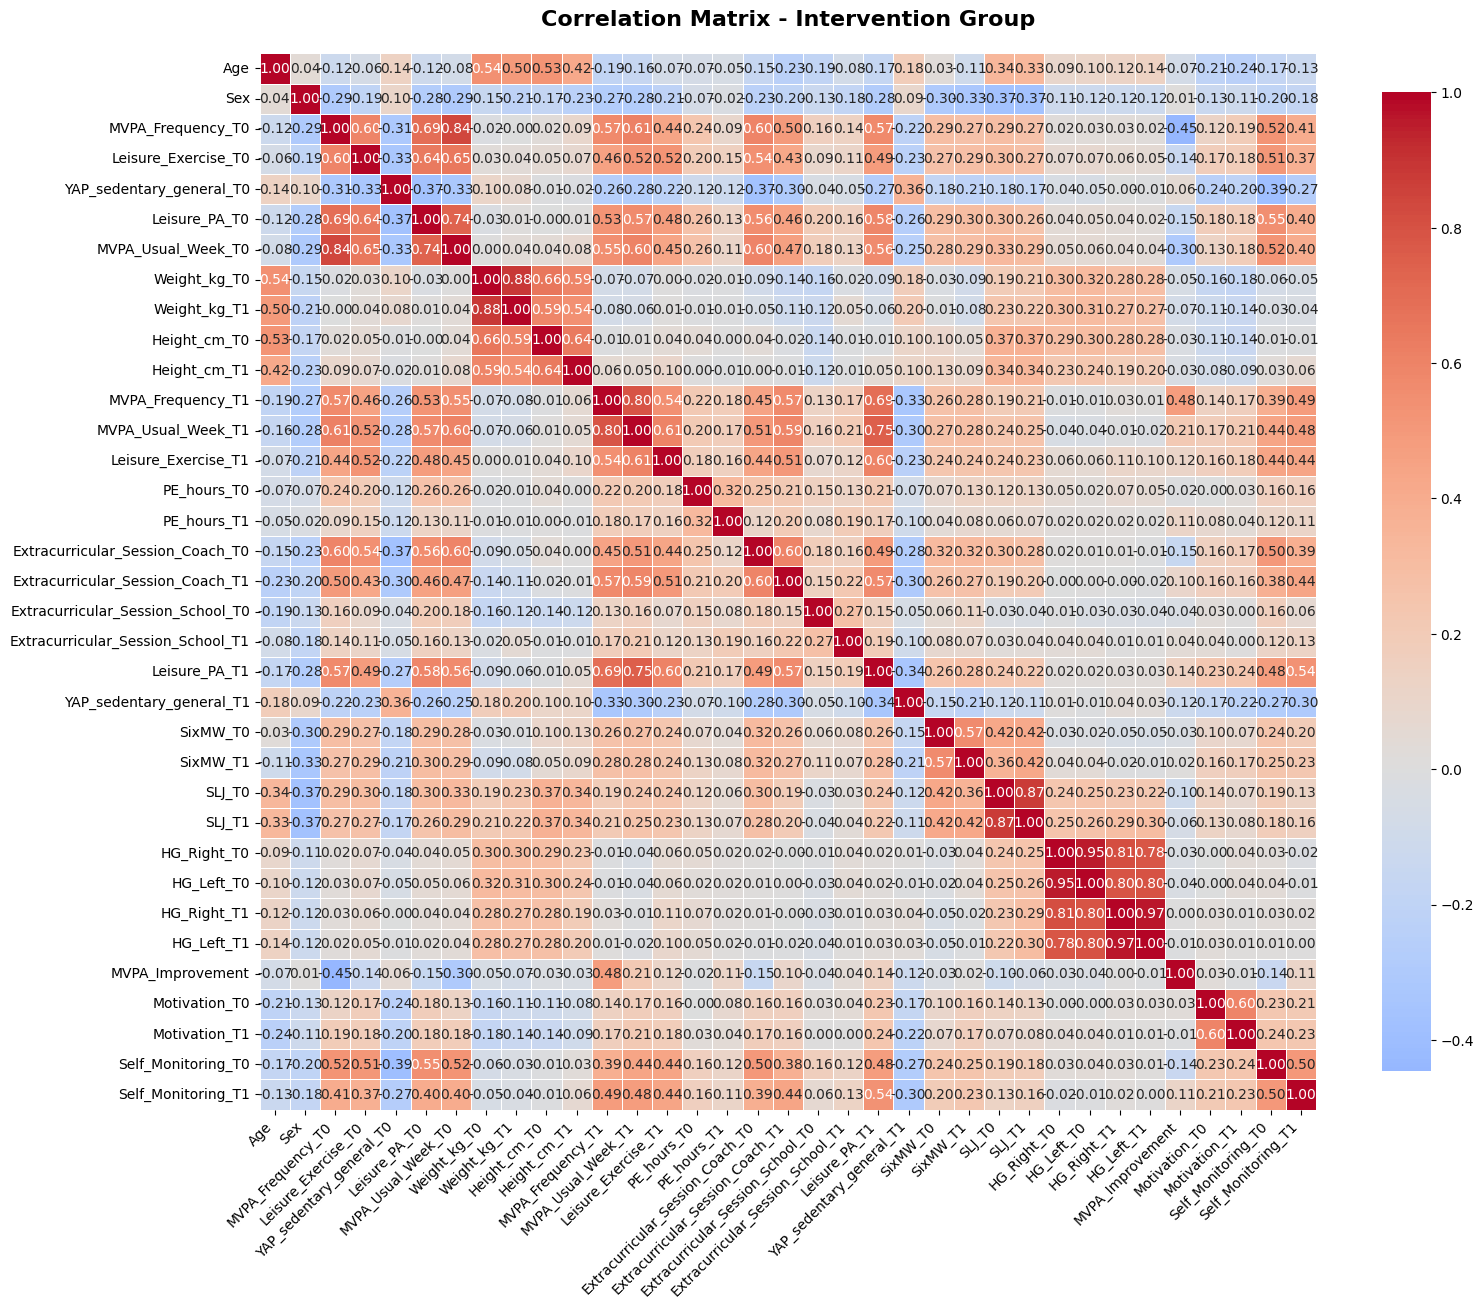

In [16]:
# Correlation matrix for intervention group
corr_I = df_I[numerical_cols].corr()

# Create heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(corr_I, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Intervention Group', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

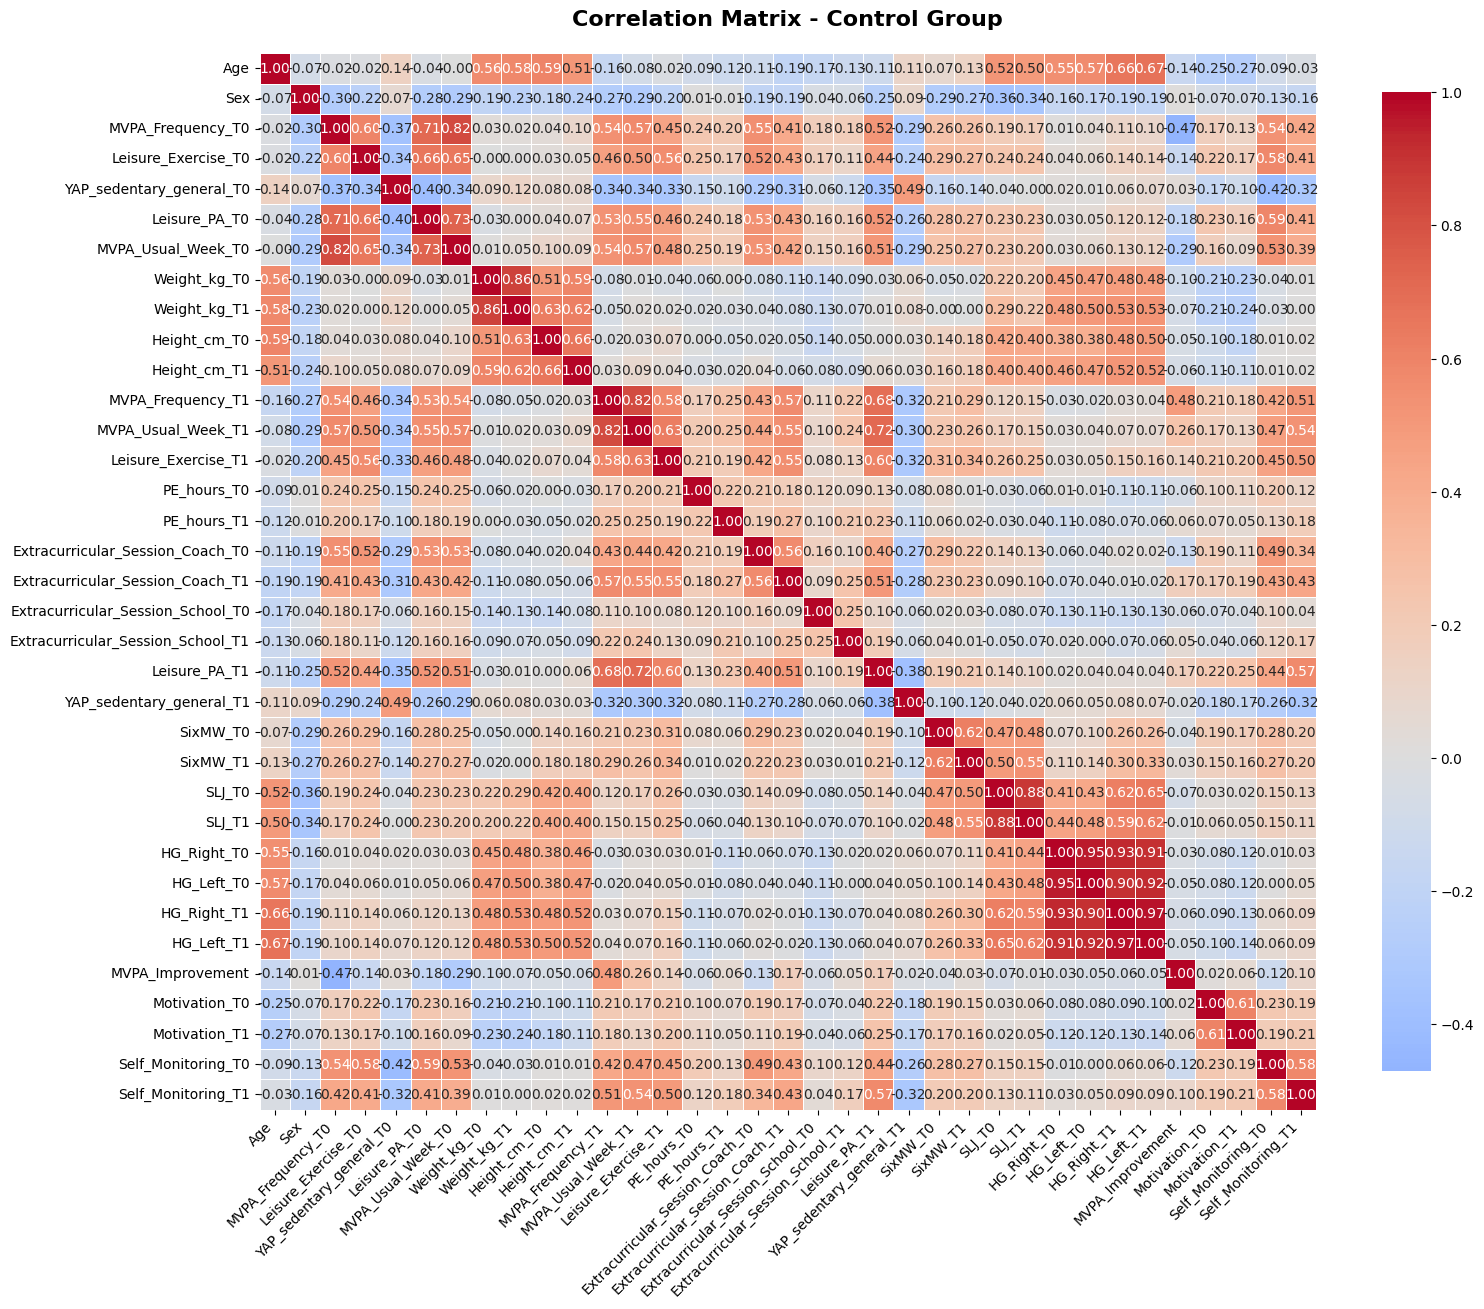

In [17]:
# Correlation matrix for control group
corr_C = df_C[numerical_cols].corr()

# Create heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(corr_C, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Control Group', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [30]:
# Find strong correlations - Intervention Group
print("=" * 80)
print("STRONG CORRELATIONS - INTERVENTION GROUP")
print("=" * 80)
strong_corr_I = []
for i in range(len(corr_I.columns)):
    for j in range(i+1, len(corr_I.columns)):
        if abs(corr_I.iloc[i, j]) > 0.5 and abs(corr_I.iloc[i, j]) < 0.7:
            strong_corr_I.append({
                'Variable 1': corr_I.columns[i],
                'Variable 2': corr_I.columns[j],
                'Correlation': corr_I.iloc[i, j]
            })

if strong_corr_I:
    strong_corr_df_I = pd.DataFrame(strong_corr_I).sort_values('Correlation', 
                                                                 ascending=False, key=abs)
    display(strong_corr_df_I)
else:
    print("No strong correlations found.")

print("\n" + "=" * 80)
print("STRONG CORRELATIONS - CONTROL GROUP")
print("=" * 80)
strong_corr_C = []
for i in range(len(corr_C.columns)):
    for j in range(i+1, len(corr_C.columns)):
        if abs(corr_C.iloc[i, j]) > 0.5 and abs(corr_C.iloc[i, j]) < 0.7:
            strong_corr_C.append({
                'Variable 1': corr_C.columns[i],
                'Variable 2': corr_C.columns[j],
                'Correlation': corr_C.iloc[i, j]
            })

if strong_corr_C:
    strong_corr_df_C = pd.DataFrame(strong_corr_C).sort_values('Correlation', 
                                                                 ascending=False, key=abs)
    display(strong_corr_df_C)
else:
    print("No strong correlations found.")

STRONG CORRELATIONS - INTERVENTION GROUP


Variable 1                        Variable 2  \
32                 MVPA_Frequency_T1                     Leisure_PA_T1   
3                  MVPA_Frequency_T0                     Leisure_PA_T0   
25                      Weight_kg_T0                      Height_cm_T0   
10               Leisure_Exercise_T0                MVPA_Usual_Week_T0   
29                      Height_cm_T0                      Height_cm_T1   
9                Leisure_Exercise_T0                     Leisure_PA_T0   
5                  MVPA_Frequency_T0                MVPA_Usual_Week_T1   
33                MVPA_Usual_Week_T1               Leisure_Exercise_T1   
37               Leisure_Exercise_T1                     Leisure_PA_T1   
21                MVPA_Usual_Week_T0                MVPA_Usual_Week_T1   
2                  MVPA_Frequency_T0               Leisure_Exercise_T0   
6                  MVPA_Frequency_T0  Extracurricular_Session_Coach_T0   
43                     Motivation_T0                     Motivation_T1   
38  Extracurricular_Session_Coach_T0  Extracurricular_Session_Coach_T1   
22                MVPA_Usual_Week_T0  Extracurricular_Session_Coach_T0   
27                      Weight_kg_T1                      Height_cm_T0   
35                MVPA_Usual_Week_T1  Extracurricular_Session_Coach_T1   
26                      Weight_kg_T0                      Height_cm_T1   
18                     Leisure_PA_T0                     Leisure_PA_T1   
4                  MVPA_Frequency_T0                 MVPA_Frequency_T1   
31                 MVPA_Frequency_T1  Extracurricular_Session_Coach_T1   
7                  MVPA_Frequency_T0                     Leisure_PA_T1   
16                     Leisure_PA_T0                MVPA_Usual_Week_T1   
40  Extracurricular_Session_Coach_T1                     Leisure_PA_T1   
42                          SixMW_T0                          SixMW_T1   
23                MVPA_Usual_Week_T0                     Leisure_PA_T1   
17                     Leisure_PA_T0  Extracurricular_Session_Coach_T0   
20                MVPA_Usual_Week_T0                 MVPA_Frequency_T1   
19                     Leisure_PA_T0                Self_Monitoring_T0   
0                                Age                      Weight_kg_T0   
28                      Weight_kg_T1                      Height_cm_T1   
30                 MVPA_Frequency_T1               Leisure_Exercise_T1   
13               Leisure_Exercise_T0  Extracurricular_Session_Coach_T0   
41                     Leisure_PA_T1                Self_Monitoring_T1   
15                     Leisure_PA_T0                 MVPA_Frequency_T1   
1                                Age                      Height_cm_T0   
24                MVPA_Usual_Week_T0                Self_Monitoring_T0   
12               Leisure_Exercise_T0               Leisure_Exercise_T1   
8                  MVPA_Frequency_T0                Self_Monitoring_T0   
11               Leisure_Exercise_T0                MVPA_Usual_Week_T1   
14               Leisure_Exercise_T0                Self_Monitoring_T0   
36               Leisure_Exercise_T1  Extracurricular_Session_Coach_T1   
34                MVPA_Usual_Week_T1  Extracurricular_Session_Coach_T0   
44                Self_Monitoring_T0                Self_Monitoring_T1   
39  Extracurricular_Session_Coach_T0                Self_Monitoring_T0   

    Correlation  
32     0.691041  
3      0.688410  
25     0.660440  
10     0.645613  
29     0.640377  
9      0.638883  
5      0.614768  
33     0.610005  
37     0.602800  
21     0.602147  
2      0.599078  
6      0.598851  
43     0.597574  
38     0.597432  
22     0.595683  
27     0.591254  
35     0.589631  
26     0.586249  
18     0.583084  
4      0.574107  
31     0.572783  
7      0.571698  
16     0.567753  
40     0.567281  
42     0.565581  
23     0.561067  
17     0.556883  
20     0.552692  
19     0.549032  
0      0.544473  
28     0.543765  
30     0.542499  
13     0.538188  
41     0.


STRONG CORRELATIONS - CONTROL GROUP


Variable 1     Variable 2  Correlation
43                 MVPA_Frequency_T1  Leisure_PA_T1     0.684498
8                                Age     HG_Left_T1     0.673868
7                                Age    HG_Right_T1     0.658853
37                      Height_cm_T0   Height_cm_T1     0.658478
15               Leisure_Exercise_T0  Leisure_PA_T0     0.656006
..                               ...            ...          ...
28                MVPA_Usual_Week_T0  Leisure_PA_T1     0.506835
51  Extracurricular_Session_Coach_T1  Leisure_PA_T1     0.505552
34                      Weight_kg_T1     HG_Left_T0     0.502275
54                          SixMW_T1         SLJ_T0     0.500618
38                      Height_cm_T0     HG_Left_T1     0.500095

[62 rows x 3 columns]

## 7. Scatter Plots for Key Relationships

Explore potential relationships between variables that might have logical connections (e.g., age-related metrics, performance indicators).

In [32]:
# Focus on relationships between baseline/demographic variables and outcome variables
# Baseline predictors: Age, Weight_kg_T0, Motivation_T0, SixMW_T0
# Outcome variables: MVPA_Frequency_T0, MVPA_Frequency_T1, MVPA_Improvement, Leisure_PA_T0, Leisure_PA_T1

baseline_vars = ['Age', 'Weight_kg_T0', 'Motivation_T0', 'SixMW_T0']
outcome_vars = ['MVPA_Frequency_T0', 'MVPA_Frequency_T1', 'MVPA_Improvement', 
                'Leisure_PA_T0', 'Leisure_PA_T1']

# Verify variables exist in the dataset
baseline_vars = [var for var in baseline_vars if var in numerical_cols]
outcome_vars = [var for var in outcome_vars if var in numerical_cols]

print("Baseline/Demographic Variables:")
for var in baseline_vars:
    print(f"  • {var}")

print("\nOutcome Variables:")
for var in outcome_vars:
    print(f"  • {var}")

# Create pairs: each baseline variable with each outcome variable
interesting_pairs = []
for baseline in baseline_vars:
    for outcome in outcome_vars:
        interesting_pairs.append((baseline, outcome))

print(f"\nCreated {len(interesting_pairs)} relationship pairs to visualize")

Baseline/Demographic Variables:
  • Age
  • Weight_kg_T0
  • Motivation_T0
  • SixMW_T0

Outcome Variables:
  • MVPA_Frequency_T0
  • MVPA_Frequency_T1
  • MVPA_Improvement
  • Leisure_PA_T0
  • Leisure_PA_T1

Created 20 relationship pairs to visualize


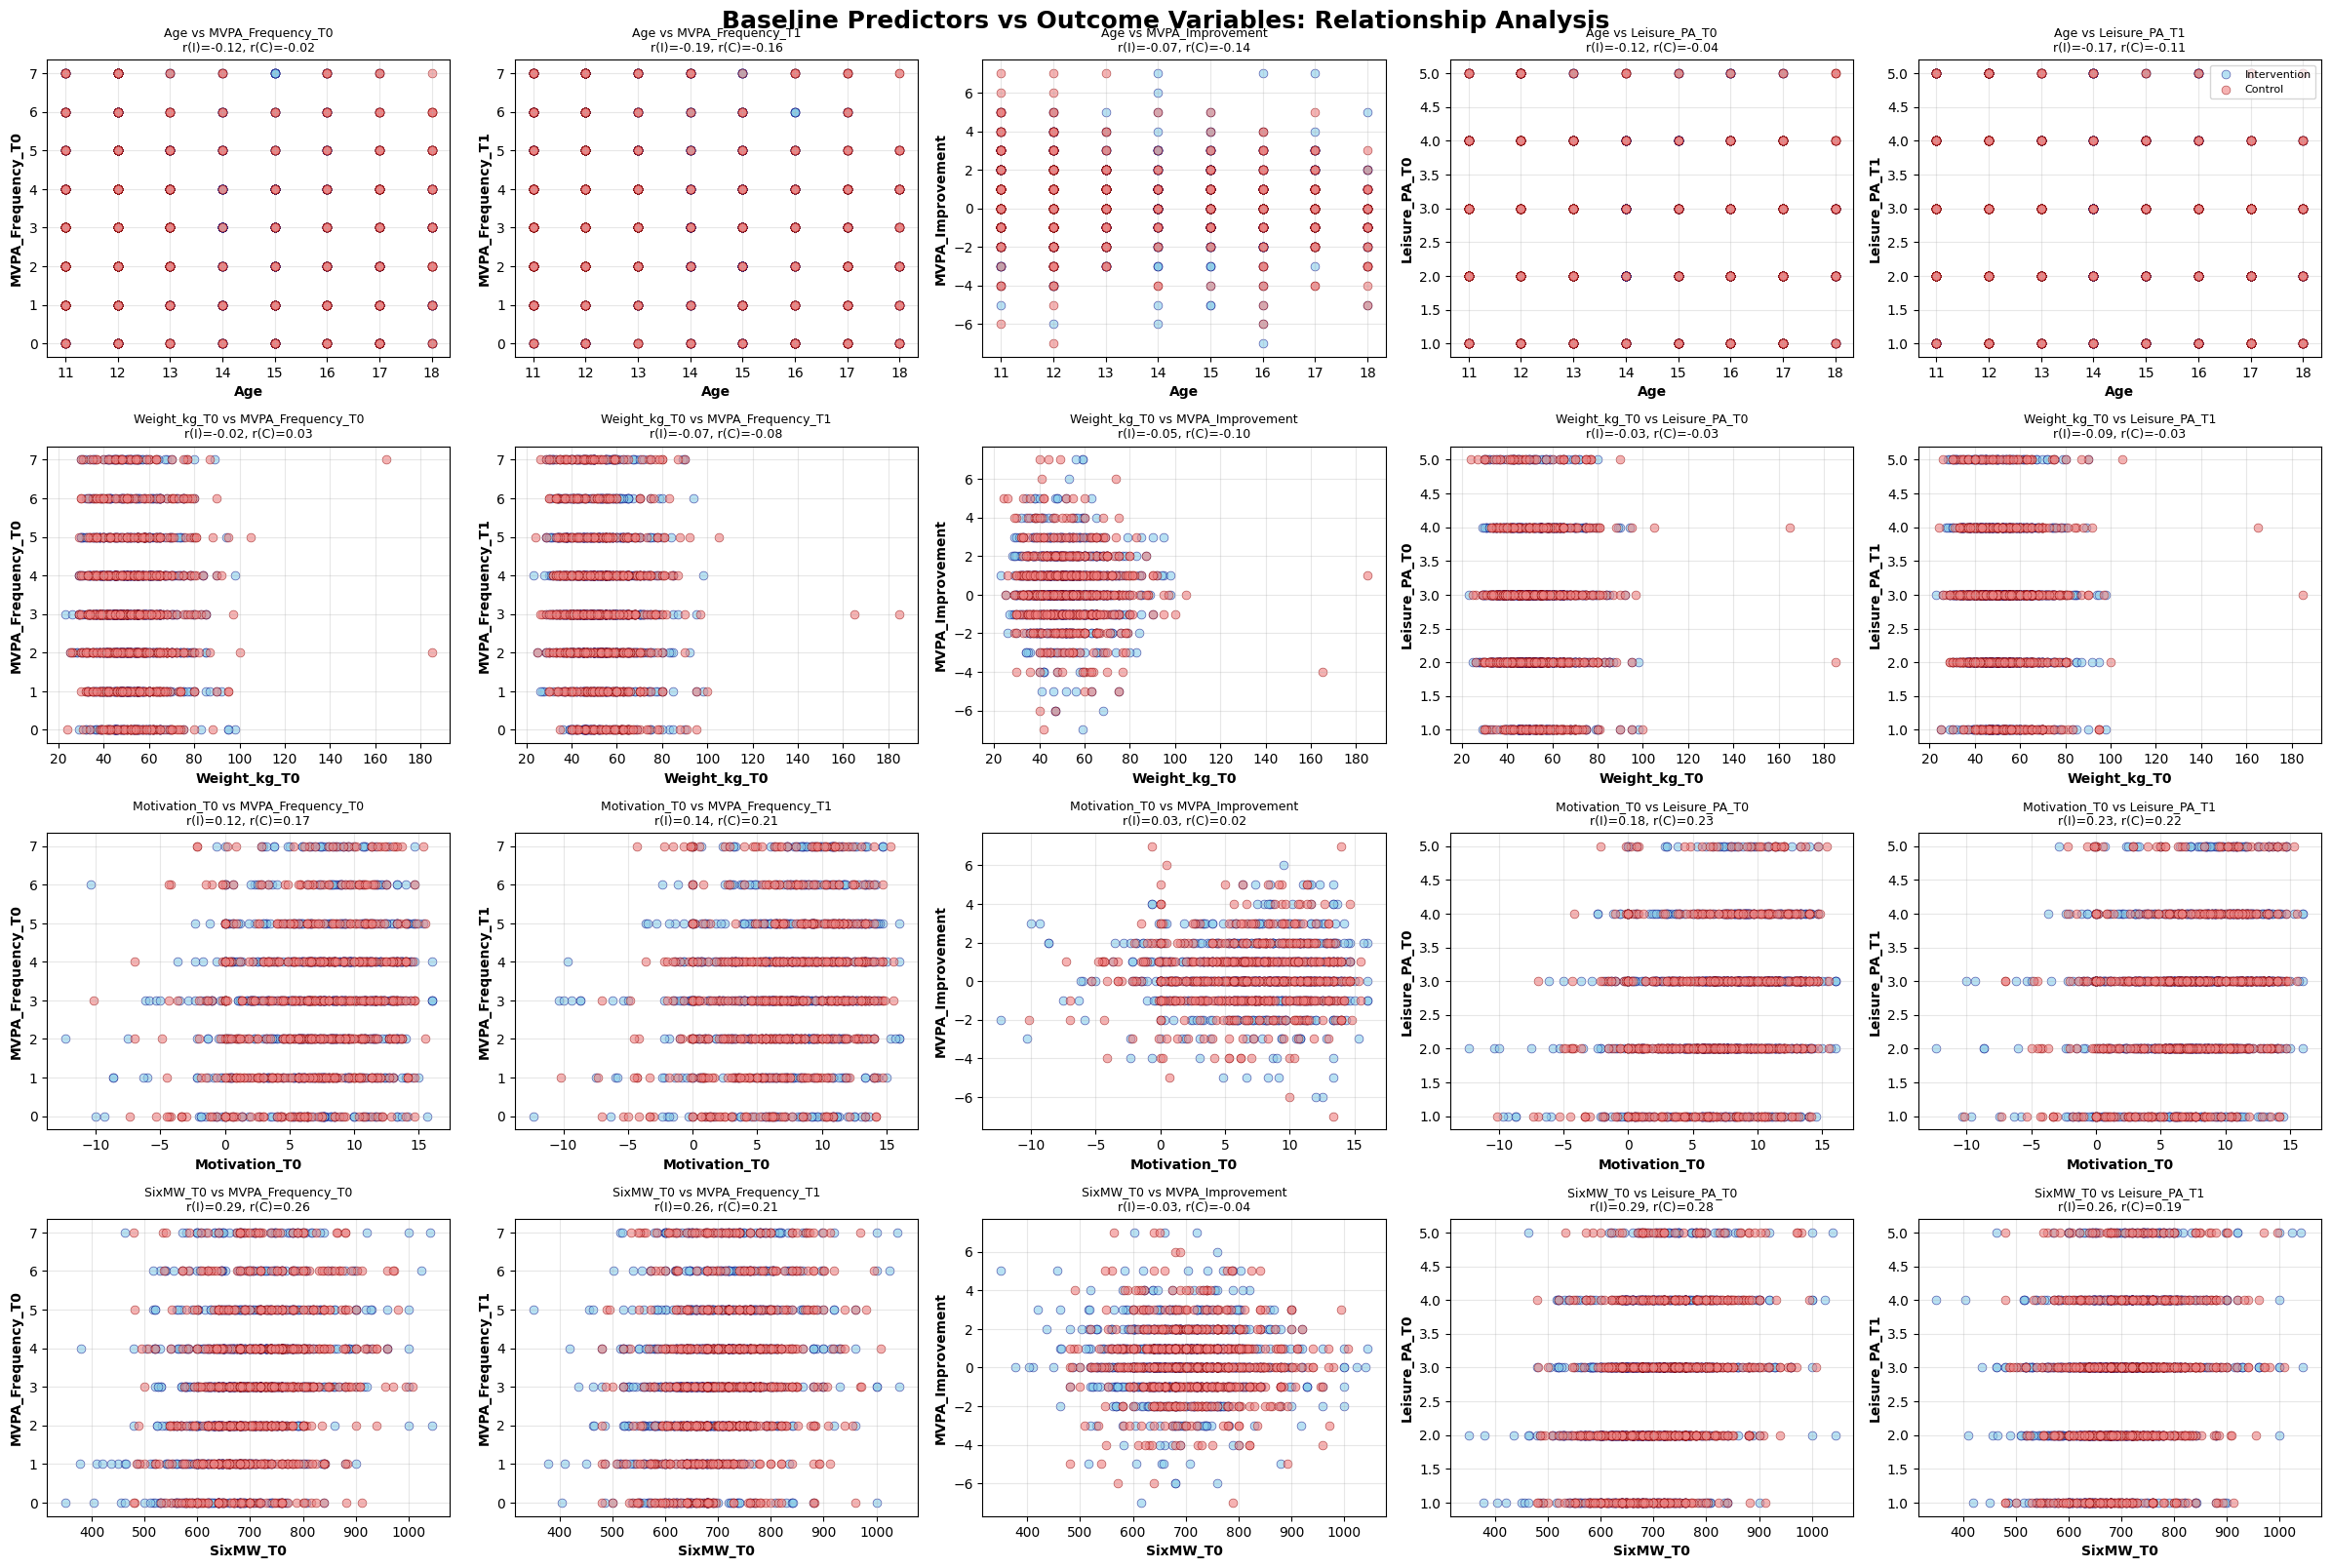

In [35]:
# Create scatter plots showing relationships between baseline and outcome variables
if len(interesting_pairs) > 0:
    n_pairs = len(interesting_pairs)
    n_scatter_cols = 5  # 5 outcome variables
    n_scatter_rows = len(baseline_vars)  # One row per baseline variable
    
    fig, axes = plt.subplots(n_scatter_rows, n_scatter_cols, figsize=(24, n_scatter_rows * 4))
    
    # Ensure axes is 2D
    if n_scatter_rows == 1:
        axes = axes.reshape(1, -1)
    if n_scatter_cols == 1:
        axes = axes.reshape(-1, 1)
    
    pair_idx = 0
    for row_idx, baseline in enumerate(baseline_vars):
        for col_idx, outcome in enumerate(outcome_vars):
            ax = axes[row_idx, col_idx]
            
            # Plot intervention group
            ax.scatter(df_I[baseline], df_I[outcome], alpha=0.6, s=40, 
                      color='skyblue', label='Intervention', edgecolors='navy', linewidth=0.5)
            # Plot control group
            ax.scatter(df_C[baseline], df_C[outcome], alpha=0.6, s=40, 
                      color='lightcoral', label='Control', edgecolors='darkred', linewidth=0.5)
            
            # Calculate and display correlation for each group
            corr_I = df_I[[baseline, outcome]].corr().iloc[0, 1]
            corr_C = df_C[[baseline, outcome]].corr().iloc[0, 1]
            
            ax.set_xlabel(baseline, fontsize=10, fontweight='bold')
            ax.set_ylabel(outcome, fontsize=10, fontweight='bold')
            ax.set_title(f'{baseline} vs {outcome}\nr(I)={corr_I:.2f}, r(C)={corr_C:.2f}', 
                        fontsize=9)
            
            if row_idx == 0 and col_idx == n_scatter_cols - 1:
                ax.legend(loc='upper right', fontsize=8)
            
            ax.grid(True, alpha=0.3)
            pair_idx += 1
    
    plt.tight_layout()
    plt.suptitle('Baseline Predictors vs Outcome Variables: Relationship Analysis', 
                 fontsize=18, fontweight='bold', y=1.002)
    plt.show()
    

## 8. Group Comparison Summary

Compare key statistics between intervention and control groups to identify significant differences.

In [24]:
# Compare means between groups
comparison_df = pd.DataFrame({
    'Intervention_Mean': df_I[numerical_cols].mean(),
    'Control_Mean': df_C[numerical_cols].mean(),
    'Intervention_Std': df_I[numerical_cols].std(),
    'Control_Std': df_C[numerical_cols].std(),
})

# Calculate difference and percentage difference
comparison_df['Mean_Difference'] = comparison_df['Intervention_Mean'] - comparison_df['Control_Mean']
comparison_df['Pct_Difference'] = ((comparison_df['Intervention_Mean'] - comparison_df['Control_Mean']) / 
                                    comparison_df['Control_Mean'] * 100).round(2)

# Sort by absolute percentage difference
comparison_df = comparison_df.sort_values('Pct_Difference', ascending=False, key=abs)

print("=" * 80)
print("MEAN COMPARISON: INTERVENTION vs CONTROL GROUPS")
print("=" * 80)
display(comparison_df)

MEAN COMPARISON: INTERVENTION vs CONTROL GROUPS


Intervention_Mean  Control_Mean  \
MVPA_Improvement                            0.312049      0.251012   
HG_Right_T0                                32.458800     28.021922   
HG_Left_T0                                 30.592480     26.428331   
Extracurricular_Session_School_T1           0.795031      0.707015   
Extracurricular_Session_School_T0           0.533402      0.594816   
MVPA_Usual_Week_T1                          3.494472      3.228000   
Extracurricular_Session_Coach_T1            2.326263      2.154667   
HG_Left_T1                                 33.380795     30.950076   
HG_Right_T1                                35.469027     33.057143   
Extracurricular_Session_Coach_T0            2.258883      2.106809   
MVPA_Frequency_T1                           3.413131      3.195219   
SLJ_T1                                    162.771242    171.422619   
MVPA_Frequency_T0                           3.102434      2.962667   
SLJ_T0                                    157.963746    165.500659   
Leisure_Exercise_T1                         3.087133      2.961333   
Motivation_T0                               7.082214      6.800000   
Self_Monitoring_T0                          3.289517      3.165845   
Leisure_PA_T1                               2.832657      2.735414   
SixMW_T0                                  690.762661    714.733945   
Sex                                         1.528302      1.480996   
YAP_sedentary_general_T1                    2.419624      2.486787   
SixMW_T1                                  723.364880    740.383792   
Self_Monitoring_T1                          3.352246      3.296440   
Weight_kg_T0                               52.068520     52.955439   
Leisure_PA_T0                               2.682604      2.646030   
Weight_kg_T1                               54.189189     54.885978   
YAP_sedentary_general_T0                    2.503074      2.471850   
PE_hours_T1                                 2.320603      2.294040   
MVPA_Usual_Week_T0                          3.158266      3.130493   
Leisure_Exercise_T0                         2.878942      2.858099   
PE_hours_T0                                 2.312064      2.306176   
Height_cm_T0                              160.524330    160.100917   
Motivation_T1                               6.179253      6.194257   
Height_cm_T1                              162.700246    162.533128   
Age                                        13.542205     13.537353   

                                   Intervention_Std  Control_Std  \
MVPA_Improvement                           1.708816     1.797638   
HG_Right_T0                               13.268268    13.347912   
HG_Left_T0                                12.303453    12.841498   
Extracurricular_Session_School_T1          1.367808     1.287038   
Extracurricular_Session_School_T0          1.112113     1.173862   
MVPA_Usual_Week_T1                         1.734581     1.843696   
Extracurricular_Session_Coach_T1           1.663751     1.642257   
HG_Left_T1                                15.152981    13.739754   
HG_Right_T1                               15.545138    14.704511   
Extracurricular_Session_Coach_T0           1.566606     1.585974   
MVPA_Frequency_T1                          1.870431     1.897052   
SLJ_T1                                    31.404699    40.562182   
MVPA_Frequency_T0                          1.830551     1.876335   
SLJ_T0                                    31.036605    36.429310   
Leisure_Exercise_T1                        1.479579     1.502947   
Motivation_T0                              4.603236     4.605082   
Self_Monitoring_T0                         1.211303     1.228430   
Leisure_PA_T1                              1.097939     1.080588   
SixMW_T0                                  94.391123    90.677162   
Sex                                        0.499446     0.499966   
YAP_sedentary_general_T1                   0.968313     0.957033   
SixMW_T1          